# Understanding House Profiles and Prices Notebook

## Objectives

* Answer business requirement 1: 
  * The client is interested in discovering how the house attributes correlate with the sale price.

## Inputs

* outputs/datasets/cleaned/HousePricesCleaned.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build Streamlit App

## Conclusions

* Higher values of 1stFlrSF, garage area, GrLivArea, MasVnrArea and TotalBsmtSF are associated with higher sale price.
* Houses with recently built garages or recently added remods have higher prices than those of earlier ones.  
* Higher Overall quality indicates higher sale prices but kitchen quality does not show clear pattern. 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/cleaned/HousePricesCleaned.csv")
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.000000,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.000000,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.000000,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,2.869214,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.000000,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


# Data Exploration

We start with data profiling report so that we get more familiar with the content of the dataset. We check variable type and distribution, missing levels and how each variable may related to our target.
* We import pandas_profiling library and generate a profile report of our data

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

Our dataset has categorical variables, and we need to encode them so that we can use them to calculate correlation coefficients.

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(5)

(1460, 40)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Missing,GarageFinish_Fin,GarageFinish_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.000000,706,150,548,2003.0,1710,8450,65.0,...,0,1,0,0,0,0,1,0,0,0
1,1262,0.0,3.000000,978,284,460,1976.0,1262,9600,80.0,...,0,1,0,0,0,0,0,1,0,0
2,920,866.0,3.000000,486,434,608,2001.0,1786,11250,68.0,...,0,1,0,0,0,0,1,0,0,0
3,961,0.0,2.869214,216,540,642,1998.0,1717,9550,60.0,...,0,0,1,0,0,0,1,0,0,0
4,1145,0.0,4.000000,655,490,836,2000.0,2198,14260,84.0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
GarageYrBlt       0.563256
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [16]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

In [17]:
top_n = 10
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

Based on the correlation study results, we will focus on the following variables and their relationship to house sale prices.
* 1stFlrSF
* GarageArea
* GarageYrBlt
* GrLivArea
* KitchenQual
* MasVnrArea
* OverallQual
* TotalBsmtSF
* YearBuilt
* YearRemodAdd

In [18]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'MasVnrArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

# EDA on selected variables

In [20]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,2003.0,1710,Gd,196.0,7,856,2003,2003,208500
1,1262,460,1976.0,1262,TA,0.0,6,1262,1976,1976,181500
2,920,608,2001.0,1786,Gd,162.0,7,920,2001,2002,223500


## Distribution Patterns of Sale Prices 

We plot the distribution of sale price in relation to both numerical and categorical features

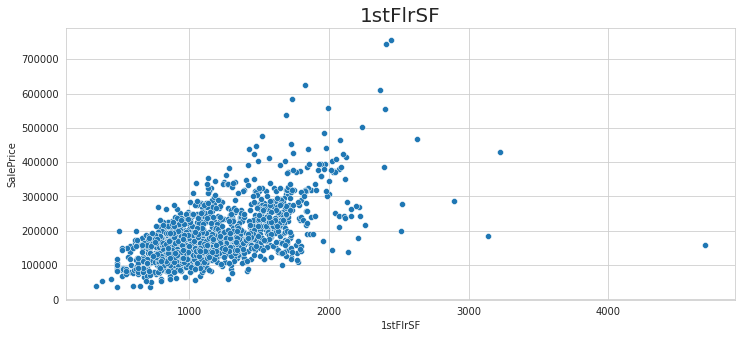

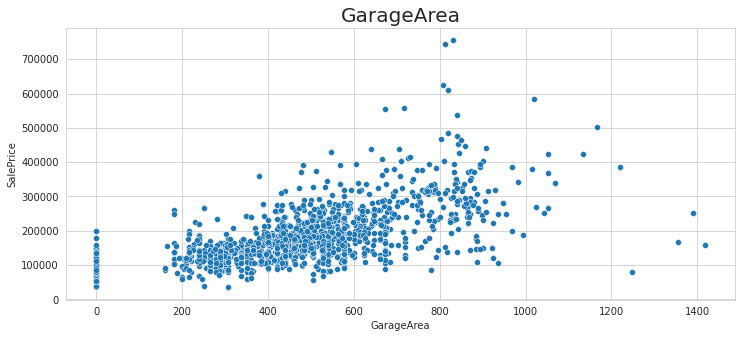

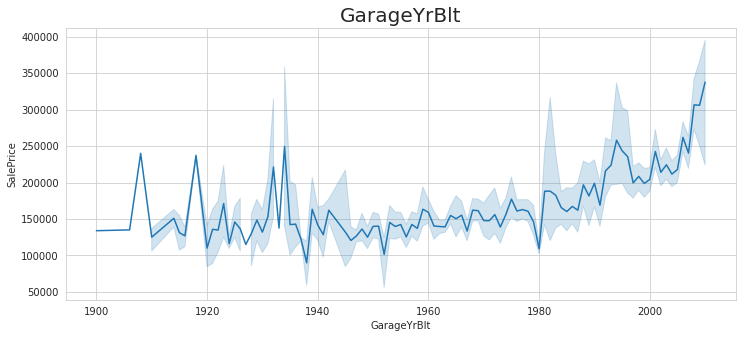

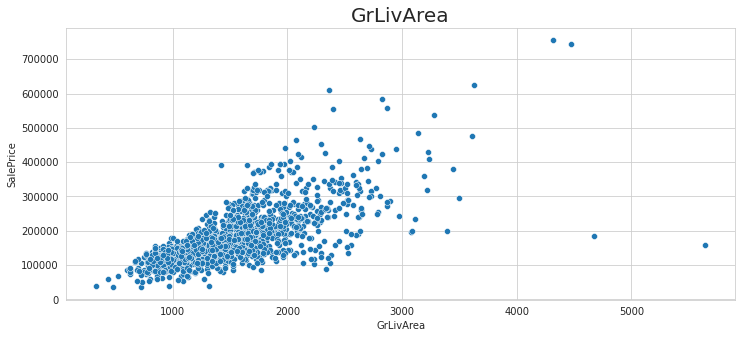

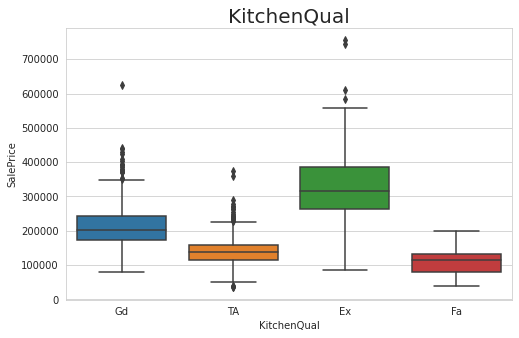

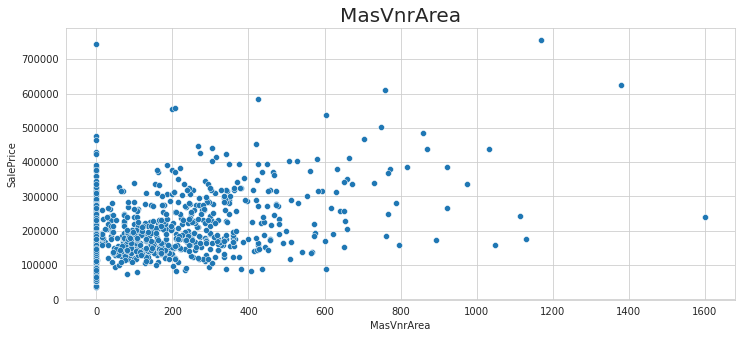

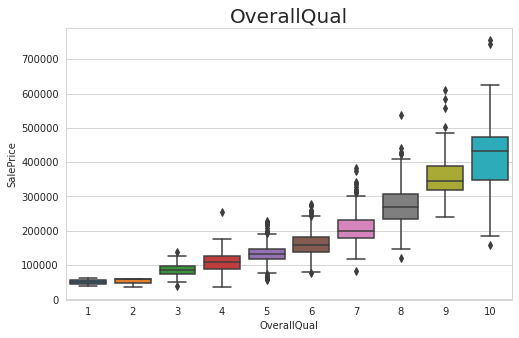

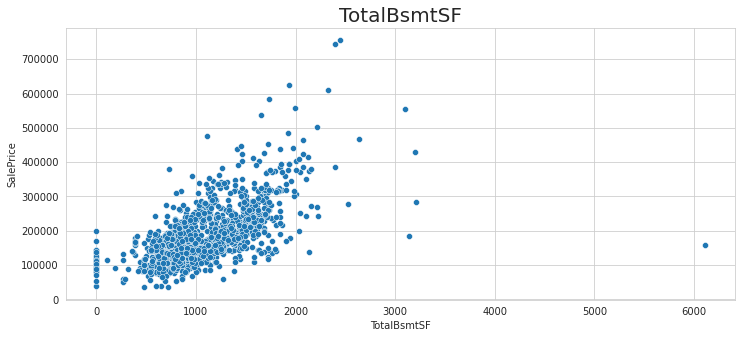

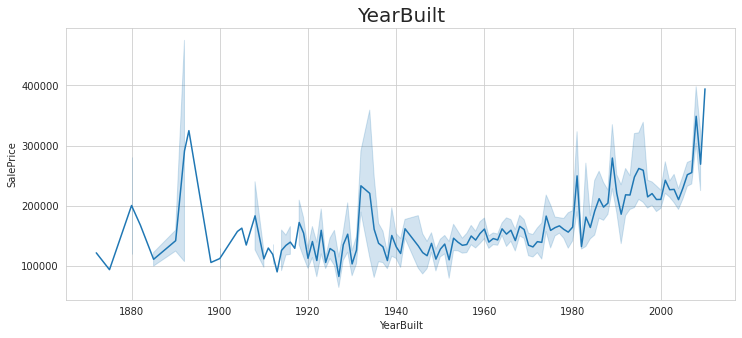

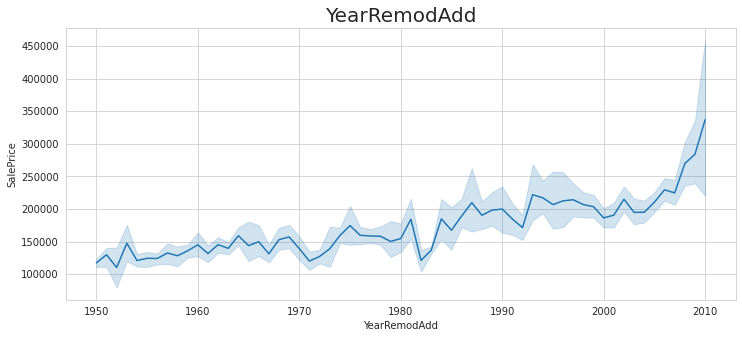

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

time = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

def plot_scatter(df, col, target_var):

  plt.figure(figsize=(12, 5))
  sns.scatterplot(data=df, x=col, y=target_var)
  plt.title(f"{col}", fontsize=20)        
  plt.show()

def plot_line(df, col, target_var):

  plt.figure(figsize=(12, 5))
  sns.lineplot(data=df, x=col, y=target_var)
  plt.title(f"{col}", fontsize=20)        
  plt.show()

def plot_box(df, col, target_var):
  plt.figure(figsize=(8, 5))
  sns.boxplot(data=df, x=col, y=target_var) 
  plt.title(f"{col}", fontsize=20)
  plt.show()



target_var = 'SalePrice'
for col in vars_to_study:
  if len(df_eda[col].unique()) <= 10:
    plot_box(df_eda, col, target_var)
    print("\n\n")
  else:
    if col in time:
      plot_line(df_eda, col, target_var)
      print("\n\n")
    else:
      plot_scatter(df_eda, col, target_var)
      print("\n\n")

---

# Conclusions and Next steps

We make the following observations from both the correlation analysis and the plots.
* Higher values of 1stFlrSF, garage area, GrLivArea, MasVnrArea and TotalBsmtSF are associated with higher sale price.
* Houses with recently built garages or recently added remods have higher prices than those of earlier ones.  
* Higher Overall quality indicates higher sale prices but kitchen quality does not show clear pattern. 